In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Logistics Regression
### 1.1 Visualizing the data1

In [2]:
data1 = pd.read_csv('ex2data1.txt',header=None, names=['exam1', 'exam2', 'admitted'])
data1.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
admit_data1 = data1[data1['admitted'].isin([1])]
notAdmit_data1 = data1[data1['admitted'].isin([0])]

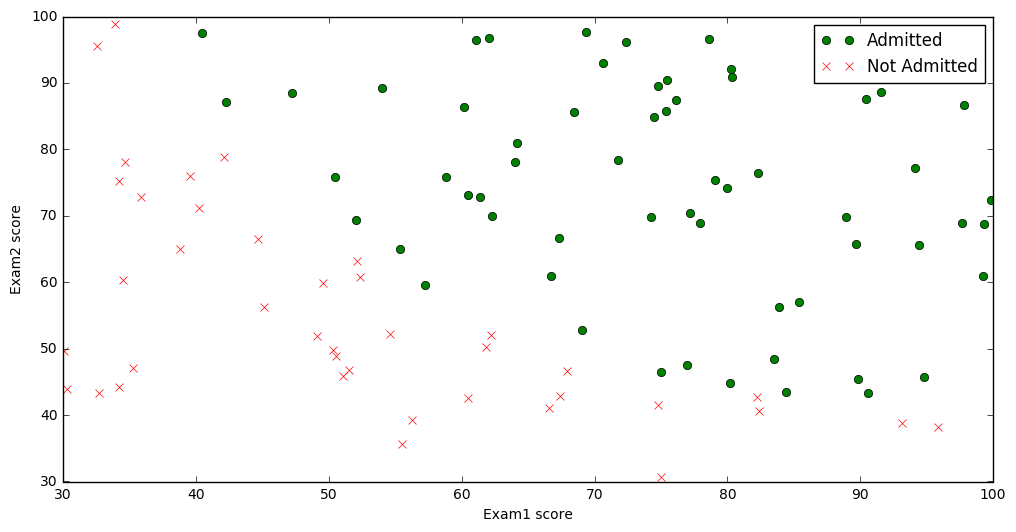

In [4]:
plt.figure(figsize=(12,6))
plt.plot(admit_data1['exam1'], admit_data1['exam2'], 'go')
plt.plot(notAdmit_data1['exam1'], notAdmit_data1['exam2'], 'rx')
plt.xlabel("Exam1 score")
plt.ylabel("Exam2 score")
plt.legend(labels = ['Admitted', 'Not Admitted'], loc='upper right') #想让图例在画布外,就加上loc=8, frameon=False, bbox_to_anchor=(0.5,-0.5)
plt.show()

### 1.2.1 Sigmoid function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

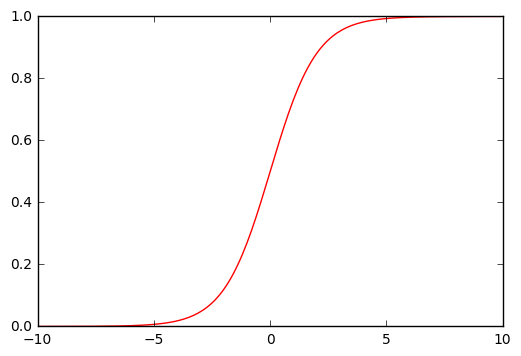

In [6]:
test_nums = np.arange(-10, 10, step=0.1)
plt.plot(test_nums, sigmoid(test_nums), 'r')
plt.show()

### 1.2.2 代价函数：

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [7]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y), np.log(1 - sigmoid(X*theta.T)))
    return np.sum(first - second) / len(X)

In [8]:
# 对数据进行处理,提取X、y. 并对X进行处理
data1.insert(0, 'ones', 1)
cols = data1.shape[1]
X = data1.iloc[:, 0:cols-1]
y = data1.iloc[:, cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(X.shape[1])

In [9]:
theta,X.shape, y.shape, theta.shape

(array([ 0.,  0.,  0.]), (100, 3), (100, 1), (3,))

In [10]:
cost(theta, X, y)

0.69314718055994529

### 1.2.3 梯度下降
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [11]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    count_theta = int(theta.ravel().shape[1])
    grad = np.zeros(count_theta)
    error = sigmoid(X * theta.T) - y
    
    for i in range(count_theta):
        tmp = np.multiply(error, X[:,i])
        grad[i] = np.sum(tmp) / len(X)
    
    return grad

注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。

In [12]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
# 使用SciPy's truncated newton (TNC) 实现寻找最优参数
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [14]:
cost(result[0], X, y)

0.20349770158947425

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。
逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
当${{h}_{\theta }}$大于等于0.5时，预测 y=1

当${{h}_{\theta }}$小于0.5时，预测 y=0 。

In [15]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if(x >= 0.5) else 0 for x in probability]

In [16]:
theta_min = np.matrix(result[0])
prediction = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(prediction, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


## Regularized logistic regression
### 2.1.1 Visualizing the data

In [17]:
data2 = pd.read_csv('ex2data2.txt', header=None, names=['test1', 'test2', 'acceptted'])
data2.head()

,test1,test2,acceptted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


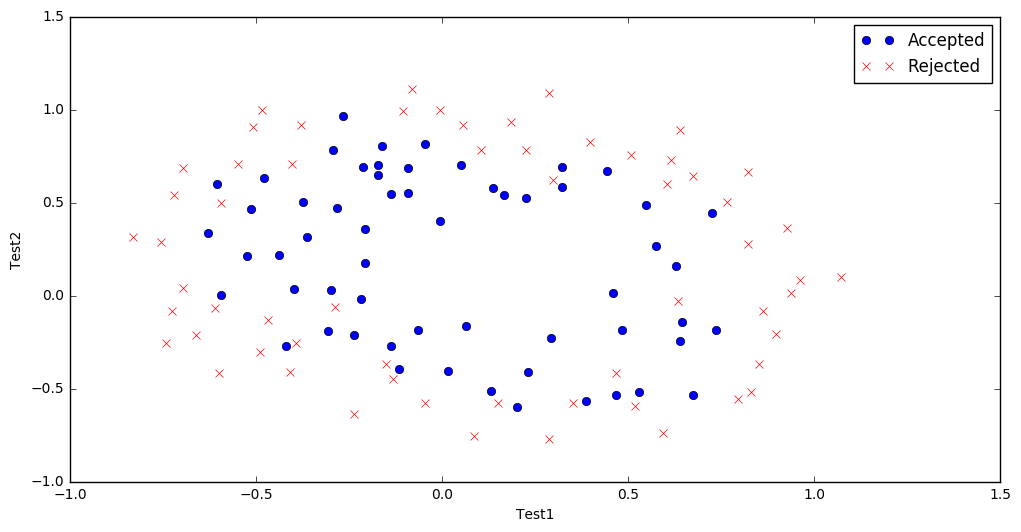

In [18]:
accept = data2[data2['acceptted'].isin([1])]
rejected = data2[data2['acceptted'].isin([0])]
plt.figure(figsize=(12,6))
plt.plot(accept['test1'], accept['test2'], 'bo')
plt.plot(rejected['test1'], rejected['test2'], 'rx')
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.legend(labels = ['Accepted', 'Rejected'], loc='upper right')
plt.show()

 ### 2.2 Feature mapping

In [19]:
degree = 5
x1 = data2['test1']
x2 = data2['test2']
data2.insert(3, 'ones', 1)
for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i)+str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('test1', axis=1, inplace=True)
data2.drop('test2', axis=1, inplace=True)
print(data2.shape)
data2.head()

(118, 12)


,acceptted,ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


### regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [21]:
def costRegular(theta, X, y, learnRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y, np.log(1- sigmoid(X*theta.T)))
    reg = (learnRate / (2*len(X))) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

使用梯度下降法令这个代价函数最小化，因为未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}-a\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

In [23]:
def gradientReg(theta, X, y, learnRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    countTheta = int(theta.ravel().shape[1])
    grad = np.zeros(countTheta)
    
    error = sigmoid(X*theta.T) - y
    for i in range(countTheta):
        term = np.multiply(error, X[:, i])
        if(i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = np.sum(term)/len(X) + (learnRate / len(X)) * theta[:, i]

    return grad

In [24]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

In [25]:
learnRate = 1
costRegular(theta2, X2, y2, learnRate)

0.6931471805599454

In [26]:
gradientReg(theta2, X2, y2, learnRate)

array([ 0.00847458,  0.01878809,  0.05034464,  0.01150133,  0.01835599,
        0.00732393,  0.00819244,  0.03934862,  0.00223924,  0.01286005,
        0.00309594])

In [27]:
result2 = opt.fmin_tnc(func=costRegular, x0=theta2, fprime=gradientReg, args=(X2, y2, learnRate))
result2

(array([ 0.53010248,  0.29075567, -1.60725764, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [32]:
theta_min = np.matrix(result2[0])
prediction2 = predict(theta_min, X2)
correct2 = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(prediction2, y2)]
accuracy2 = (sum(map(int, correct2)) % len(correct2))
print('accuracy2 = {0}%'.format(accuracy2))

accuracy2 = 78%


使用高级Python库像scikit-learn来解决这个问题

In [30]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
model.score(X2, y2)

0.66101694915254239